In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.decomposition import PCA

Importing Data

In [ ]:
sample = pd.read_csv('/content/Dataset 4 Metabolomics Dataset.csv')
print(sample)

               Unnamed: 0        S1        S2        S3        S4        S5  \
0     Compound Annotation  1.000000  1.000000  1.000000  1.000000  1.000000   
1            Compound2032  6.431117  6.509493  6.493063  6.013587  6.362181   
2            Compound4137  6.417512  6.399319  6.374473  6.451286  6.476596   
3              Compound61  7.872195  8.161216  7.485495  8.149100  7.032339   
4            Compound1854  7.131463  7.061611  6.804217  6.871522  6.860581   
...                   ...       ...       ...       ...       ...       ...   
3622         Compound4178  5.385642  5.874708  5.706090  5.594383  5.778984   
3623         Compound4187  5.682430  5.979032  5.720203  5.673056  5.780000   
3624         Compound4201  5.597144  5.960879  5.748988  5.460949  5.814987   
3625         Compound4212  5.764235  5.799950  5.807507  5.581169  5.718705   
3626         Compound4214  5.811864  5.753205  5.736518  5.649943  5.789778   

            S6        S7        S8        S9  ...  

Dropping the unwanted group row

In [ ]:
row_to_drop = 0  # Replace with the index of the row you want to remove

sample = sample.drop(row_to_drop)

# Now 'your_dataframe' will have one less row
print("Shape after dropping a row:", sample.shape)
print(sample)

Shape after dropping a row: (3626, 28)
        Unnamed: 0        S1        S2        S3        S4        S5  \
1     Compound2032  6.431117  6.509493  6.493063  6.013587  6.362181   
2     Compound4137  6.417512  6.399319  6.374473  6.451286  6.476596   
3       Compound61  7.872195  8.161216  7.485495  8.149100  7.032339   
4     Compound1854  7.131463  7.061611  6.804217  6.871522  6.860581   
5     Compound2608  7.159278  6.875667  7.253232  7.051521  7.197950   
...            ...       ...       ...       ...       ...       ...   
3622  Compound4178  5.385642  5.874708  5.706090  5.594383  5.778984   
3623  Compound4187  5.682430  5.979032  5.720203  5.673056  5.780000   
3624  Compound4201  5.597144  5.960879  5.748988  5.460949  5.814987   
3625  Compound4212  5.764235  5.799950  5.807507  5.581169  5.718705   
3626  Compound4214  5.811864  5.753205  5.736518  5.649943  5.789778   

            S6        S7        S8        S9  ...       S18       S19  \
1     6.451614  6.40046

Removing the Compound Annotation Column

In [ ]:
sample = sample.drop(sample.columns[0], axis=1)
print(sample)

            S1        S2        S3        S4        S5        S6        S7  \
1     6.431117  6.509493  6.493063  6.013587  6.362181  6.451614  6.400461   
2     6.417512  6.399319  6.374473  6.451286  6.476596  6.279623  6.424527   
3     7.872195  8.161216  7.485495  8.149100  7.032339  7.682198  8.976983   
4     7.131463  7.061611  6.804217  6.871522  6.860581  6.728661  6.927661   
5     7.159278  6.875667  7.253232  7.051521  7.197950  7.102376  7.130156   
...        ...       ...       ...       ...       ...       ...       ...   
3622  5.385642  5.874708  5.706090  5.594383  5.778984  5.545299  5.603756   
3623  5.682430  5.979032  5.720203  5.673056  5.780000  5.664391  5.511514   
3624  5.597144  5.960879  5.748988  5.460949  5.814987  5.536522  5.401805   
3625  5.764235  5.799950  5.807507  5.581169  5.718705  5.598959  5.618620   
3626  5.811864  5.753205  5.736518  5.649943  5.789778  5.637912  5.696885   

            S8        S9       S10  ...       S18       S19    

In [ ]:
max(sample["S1"]) - min(sample["S1"])

4.647211901

In [ ]:
five_quantile = [sample.quantile(0),
                 sample.quantile(0.25),
                 sample.quantile(0.50),
                 sample.quantile(0.75),
                 sample.quantile(1)]
five_quantile

[S1     5.273009
 S2     5.501612
 S3     5.323305
 S4     5.253950
 S5     5.461017
 S6     5.349926
 S7     5.288209
 S8     5.337704
 S9     5.374588
 S10    5.417587
 S11    5.630719
 S12    5.482562
 S13    5.329037
 S14    5.464346
 S15    5.366971
 S16    5.352682
 S17    5.360591
 S18    5.365466
 S19    5.465949
 S20    5.288864
 S21    5.366256
 S22    5.330246
 S23    5.225996
 S24    5.647360
 S25    5.426834
 S26    5.444623
 S27    5.433403
 Name: 0.0, dtype: float64,
 S1     6.756975
 S2     6.749991
 S3     6.747695
 S4     6.746303
 S5     6.751384
 S6     6.741873
 S7     6.752313
 S8     6.756436
 S9     6.763418
 S10    6.751183
 S11    6.753758
 S12    6.752627
 S13    6.754948
 S14    6.746264
 S15    6.756046
 S16    6.747578
 S17    6.756997
 S18    6.753111
 S19    6.744895
 S20    6.749107
 S21    6.749980
 S22    6.753766
 S23    6.746568
 S24    6.747297
 S25    6.753432
 S26    6.752355
 S27    6.751379
 Name: 0.25, dtype: float64,
 S1     6.986703
 S2     

In [ ]:
sample.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27
count,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,...,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000
mean,7.048865,7.073195,7.031306,7.037556,7.038204,7.025165,7.070522,7.054124,7.076579,7.062631,...,7.070399,7.045177,7.047765,7.042215,7.050998,7.038381,7.049266,7.061104,7.049603,7.062099
std,0.582040,0.579646,0.559828,0.590942,0.555893,0.577223,0.602699,0.592837,0.591017,0.578979,...,0.587645,0.572188,0.574360,0.576632,0.573165,0.579074,0.545682,0.564783,0.570542,0.589112
min,5.273009,5.501612,5.323305,5.253950,5.461017,5.349926,5.288209,5.337704,5.374588,5.417587,...,5.365466,5.465949,5.288864,5.366256,5.330246,5.225996,5.647360,5.426834,5.444623,5.433403
25%,6.756975,6.749991,6.747695,6.746303,6.751384,6.741873,6.752313,6.756436,6.763418,6.751183,...,6.753111,6.744895,6.749107,6.749980,6.753766,6.746568,6.747297,6.753432,6.752355,6.751379
50%,6.986703,6.993898,6.972487,6.969424,6.972188,6.974728,6.999662,6.984442,7.007360,6.984623,...,6.992910,6.981711,6.979898,6.975180,6.971889,6.969084,6.971389,6.984165,6.981760,6.983514
75%,7.335759,7.364606,7.314878,7.327879,7.309380,7.310033,7.374787,7.349520,7.379357,7.367371,...,7.361324,7.336155,7.327041,7.325815,7.341233,7.325701,7.316691,7.346818,7.331404,7.343834
max,9.920221,9.967219,9.808153,9.857103,9.647723,9.779325,10.078981,9.899948,10.038507,9.899451,...,9.856126,9.850695,9.826235,10.038143,9.925490,10.000370,9.846037,9.831569,9.963257,9.723415


In [ ]:
sample.var()

S1     0.338771
S2     0.335990
S3     0.313407
S4     0.349213
S5     0.309017
S6     0.333186
S7     0.363246
S8     0.351455
S9     0.349301
S10    0.335217
S11    0.294138
S12    0.336301
S13    0.355101
S14    0.294506
S15    0.328611
S16    0.337989
S17    0.345695
S18    0.345327
S19    0.327399
S20    0.329890
S21    0.332505
S22    0.328518
S23    0.335326
S24    0.297768
S25    0.318980
S26    0.325518
S27    0.347053
dtype: float64

In [ ]:
sample.std()

S1     0.582040
S2     0.579646
S3     0.559828
S4     0.590942
S5     0.555893
S6     0.577223
S7     0.602699
S8     0.592837
S9     0.591017
S10    0.578979
S11    0.542345
S12    0.579914
S13    0.595903
S14    0.542684
S15    0.573246
S16    0.581368
S17    0.587958
S18    0.587645
S19    0.572188
S20    0.574360
S21    0.576632
S22    0.573165
S23    0.579074
S24    0.545682
S25    0.564783
S26    0.570542
S27    0.589112
dtype: float64

array([[<Axes: title={'center': 'S1'}>, <Axes: title={'center': 'S2'}>,
        <Axes: title={'center': 'S3'}>, <Axes: title={'center': 'S4'}>,
        <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'S6'}>, <Axes: title={'center': 'S7'}>,
        <Axes: title={'center': 'S8'}>, <Axes: title={'center': 'S9'}>,
        <Axes: title={'center': 'S10'}>],
       [<Axes: title={'center': 'S11'}>, <Axes: title={'center': 'S12'}>,
        <Axes: title={'center': 'S13'}>, <Axes: title={'center': 'S14'}>,
        <Axes: title={'center': 'S15'}>],
       [<Axes: title={'center': 'S16'}>, <Axes: title={'center': 'S17'}>,
        <Axes: title={'center': 'S18'}>, <Axes: title={'center': 'S19'}>,
        <Axes: title={'center': 'S20'}>],
       [<Axes: title={'center': 'S21'}>, <Axes: title={'center': 'S22'}>,
        <Axes: title={'center': 'S23'}>, <Axes: title={'center': 'S24'}>,
        <Axes: title={'center': 'S25'}>],
       [<Axes: title={'center': 'S26'}>, <Axes: title={'cen

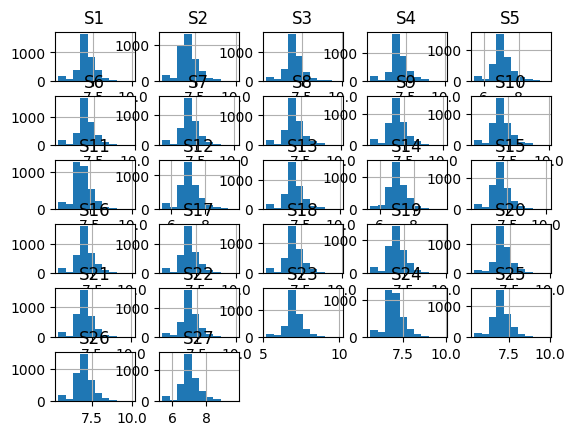

In [ ]:
sample.hist()

In [ ]:
mean = np.mean(sample, axis=0)
std = np.std(sample, axis=0)

standardized_data = (sample - mean) / std

# Remove features with zero variance
non_constant_features = np.std(standardized_data, axis=0) > 0
standardized_data = standardized_data.to_numpy(non_constant_features)

print(standardized_data)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


Principal Component Analysis

In [ ]:
mean = np.mean(sample, axis=0)
std = np.std(sample, axis=0)

standardized_data = (sample - mean) / std

# Remove features with zero variance
non_constant_features = np.std(standardized_data, axis=0) > 0
standardized_data = standardized_data.to_numpy(non_constant_features)

# Create a PCA instance with the desired number of components
n_components = min(10, 1000)  # You can choose the number of components based on your needs
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
principal_components = pca.fit_transform(standardized_data)

# Optional: Print the explained variance ratio to understand how much variance is retained
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Access the principal components
print("Principal Components:", principal_components)

Explained Variance Ratio: [nan nan nan nan nan nan nan nan nan nan]
Principal Components: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:642: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.title('PCA Visualization with Colored Points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Labels')
plt.show()

NameError: name 'labels' is not defined

<Figure size 800x600 with 0 Axes>